In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Student_Performance.csv")
data["Extracurricular Activities"] = data["Extracurricular Activities"].map({"Yes": 1, "No": 0})
x = data.iloc[:,0:-1].values
m,n = x.shape
y = data.iloc[:,-1].values

In [4]:
theta = np.zeros(n + 1)

In [5]:
def forward(x,theta):
    x_b = np.hstack([np.ones((x.shape[0],1)), x])
    return x_b @ theta

def cost_function(x, y, theta):
    m = len(y)
    y_pred = forward(x, theta)
    cost = (1/(2*m)) * ((y_pred - y).T @ (y_pred - y))
    return cost

def gradient_descent(x,y,theta,l = 0.01):
    m = len(y)
    x_b = np.hstack([np.ones((m,1)), x])
    y_pred = forward(x,theta)
    gradient = 1/(m)*(x_b.T @ (y_pred - y))
    theta -= l * gradient
    return theta



In [16]:
cost_function(x,y,theta)

np.float64(12.245245709530233)

In [15]:
for i in range(10000):
    theta = gradient_descent(x,y,theta,l = 0.0003)

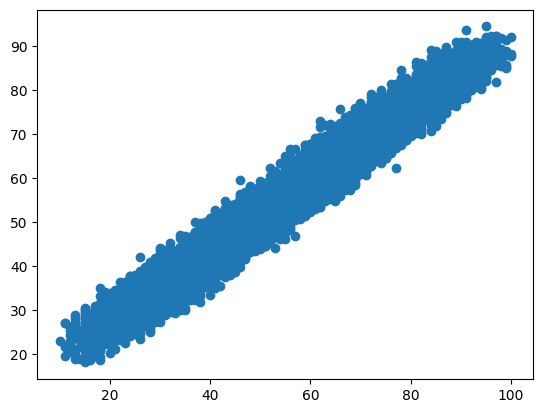

In [17]:
predict = forward(x,theta)
plt.scatter(y,predict)

In [19]:
y_pred = forward(x, theta)
y_mean = np.mean(y)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y_mean)**2)

r2_score = 1 - (ss_res / ss_tot)
print(f"R-squared Score: {r2_score}")

R-squared Score: 0.9336454730838164
